## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
#try to change every chart here, and maybe add some new ones



---



## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [4]:
df = pd.read_csv("user_behavior_dataset.csv")
# To display the top 5 rows 
df.head(5)               

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
df.tail(5)                        # To display the botton 5 rows

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3




---



## 3. Checking the types of data

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [6]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object



---



## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [12]:
# I recoomand to drop the column User Behavior Class-classification of user behavior based on usage patterns (1 to 5).) because we do not
# know the patterns. 
df = df.drop(['User Behavior Class'], axis=1)
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female




---



## 6. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [13]:
df.shape

(700, 10)

In [14]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


Now let us remove the duplicate data because it's ok to remove them.

In [15]:
df.count()      # Used to count the number of rows

User ID                       700
Device Model                  700
Operating System              700
App Usage Time (min/day)      700
Screen On Time (hours/day)    700
Battery Drain (mAh/day)       700
Number of Apps Installed      700
Data Usage (MB/day)           700
Age                           700
Gender                        700
dtype: int64

In [16]:
df = df.drop_duplicates()
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [17]:
df.count()

User ID                       700
Device Model                  700
Operating System              700
App Usage Time (min/day)      700
Screen On Time (hours/day)    700
Battery Drain (mAh/day)       700
Number of Apps Installed      700
Data Usage (MB/day)           700
Age                           700
Gender                        700
dtype: int64



---



## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

<Axes: xlabel='App Usage Time (min/day)'>

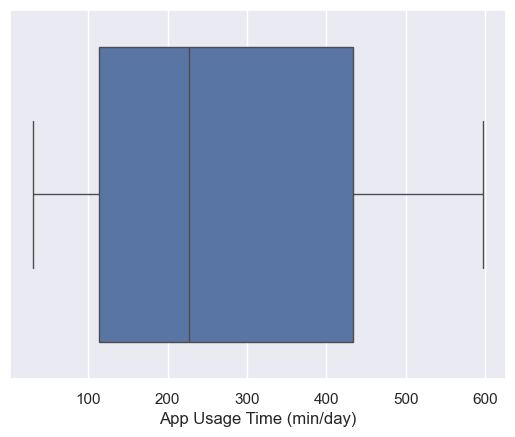

In [19]:
# what other charts can we use to see outliers?
sns.boxplot(x=df['App Usage Time (min/day)'])

<Axes: xlabel='Screen On Time (hours/day)'>

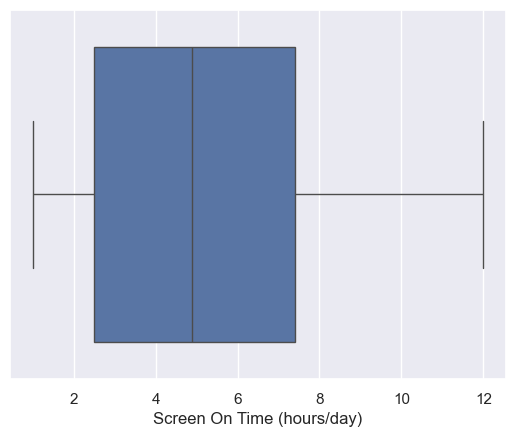

In [20]:
sns.boxplot(x=df['Screen On Time (hours/day)'])

<Axes: xlabel='Battery Drain (mAh/day)'>

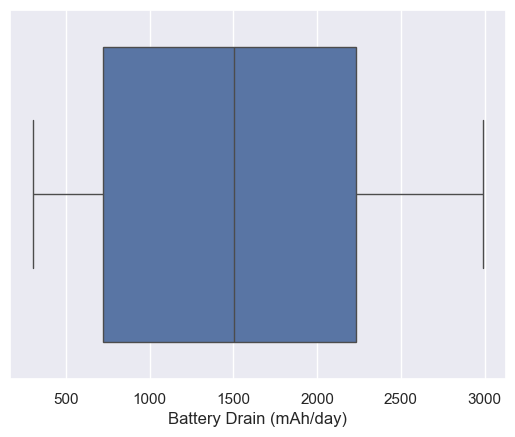

In [21]:
sns.boxplot(x=df['Battery Drain (mAh/day)'])

<Axes: xlabel='Number of Apps Installed'>

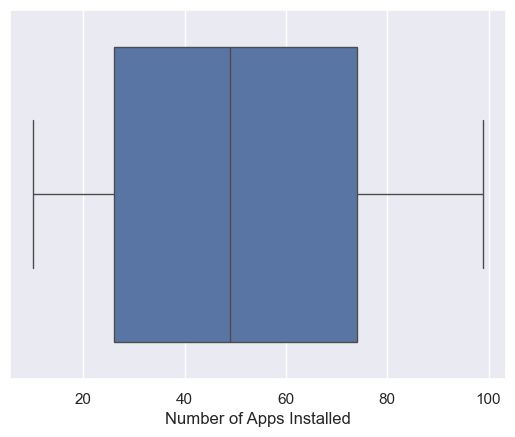

In [24]:
sns.boxplot(x=df['Number of Apps Installed'])

<Axes: xlabel='Data Usage (MB/day)'>

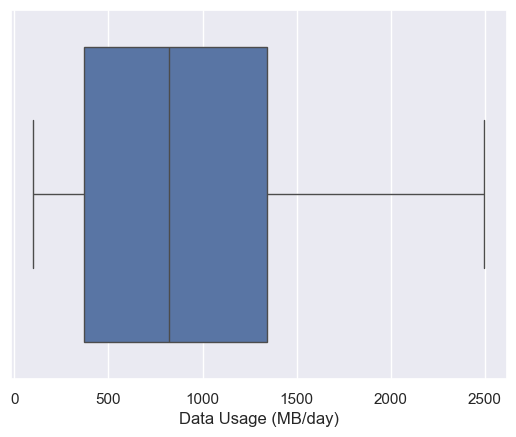

In [26]:
sns.boxplot(x=df['Data Usage (MB/day)'])


Bar chart

In [30]:
print(df.columns)

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender'],
      dtype='object')


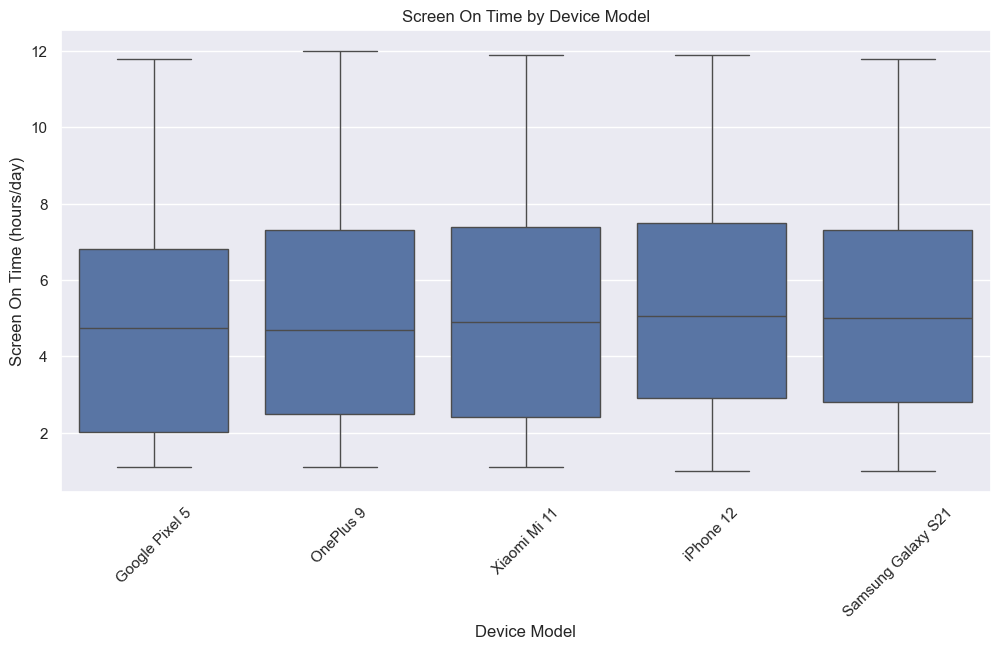

In [35]:
df['Device Model'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Mobile Device Usage?")
plt.ylabel('Number of Mobile Device')
plt.xlabel('User ID')

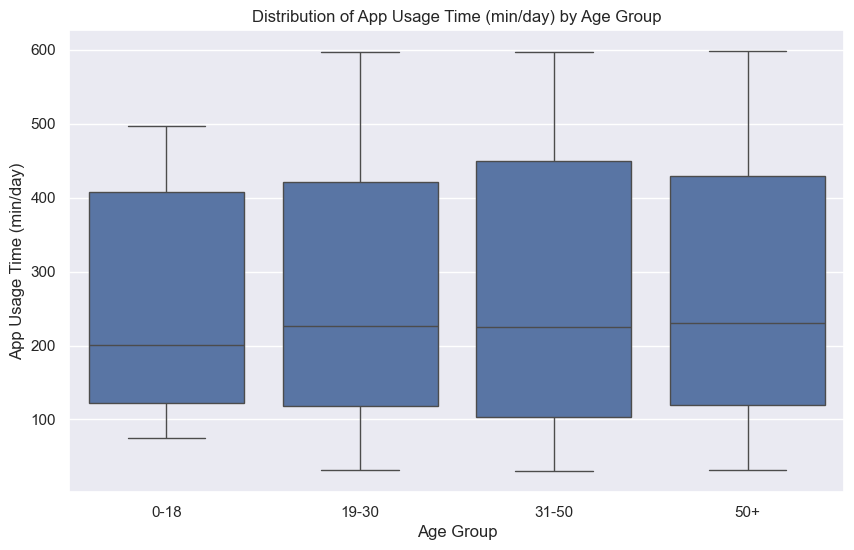

In [41]:

df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '50+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='App Usage Time (min/day)', data=df)
plt.xlabel('Age Group')
plt.ylabel('App Usage Time (min/day)')
plt.title('Distribution of App Usage Time (min/day) by Age Group')
plt.show()